In [2]:
import sys
import os

curr_path = !pwd
curr_path[0]

'/Users/jonathanperalgort/Documents/DL-CMPT420/final_project/src/notebooks'

In [3]:
os.path.join(os.path.dirname(curr_path[0]), '..', 'dataset')

'/Users/jonathanperalgort/Documents/DL-CMPT420/final_project/src/../dataset'

In [4]:

utils_path = os.path.join(os.path.dirname(curr_path[0]), 'utils')
dataset_path = os.path.join(os.path.dirname(curr_path[0]), '..', 'dataset')
sys.path.extend([utils_path, dataset_path])

In [5]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from DataLoader import CelebADataset  
import pandas as pd

In [6]:
dataset_path = r"../../dataset/Img/img_align_celeba"
attr_file_path = r"../../dataset/Anno/list_attr_celeba.txt"
dataset = CelebADataset(dataset_path, attr_file_path)

In [7]:
# annotations = pd.read_csv(attr_file_path, sep=r"\s+", header=1)
annotations = pd.read_csv(attr_file_path, sep=r"\s+", header=1)

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
annotations

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,-1,1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1
202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,1,-1,1,1,-1,1,-1,-1,1


### EDA:

Total number of images

In [12]:
annotations.shape[0]

202599

Total number of positive classes

In [16]:
print(f"Total number of blonde celebs: {annotations[annotations['Blond_Hair'] == 1].shape[0]}")

Total number of blonde celebs: 29983


In [17]:
print(f"Total number of non-blonde celebs: {annotations[annotations['Blond_Hair'] == -1].shape[0]}")

Total number of non-blonde celebs: 172616


In [15]:
img_sample_path = os.path.join(dataset_path, '000001.jpg')

In [16]:
[f"{i:06d}.jpg" for i in range(1, 5 + 1)]

['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg']

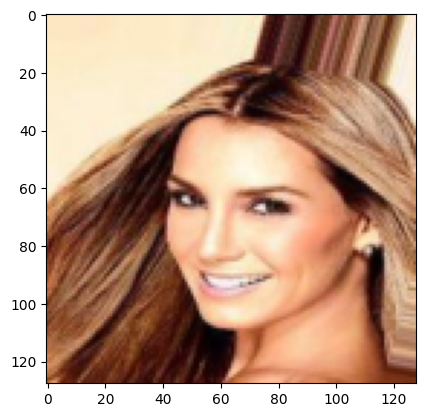

In [17]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images
    transforms.ToTensor(),          # Convert to PyTorch tensor
])

from PIL import Image

img_test = Image.open(img_sample_path).convert('RGB')
img_test = transform(img_test)
plt.figure()
plt.imshow(img_test.permute(1,2,0))

img=000001.jpg, label=0.0
img=000013.jpg, label=1.0
img=000014.jpg, label=0.0
img=000018.jpg, label=1.0
img=000020.jpg, label=0.0


<Figure size 640x480 with 0 Axes>

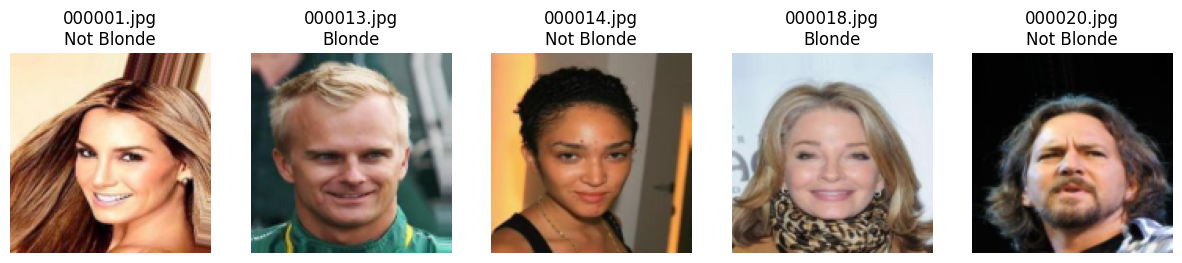

In [88]:
plt.figure()
count = 0
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(0, len(dataset)):
    if count >=5:
        break

    img, label, filename = dataset[i]

    if (label == 0 and count % 2 == 0) or (label == 1 and count % 2 == 1):
        print(f"img={filename}, label={label}")
        axes[count].imshow(img.permute(1, 2, 0))
        axes[count].axis("off")
        axes[count].set_title(f"{filename}\n{'Blonde' if label == 1 else 'Not Blonde'}")
        count += 1